## 실습 데이터 불러오기

In [1]:
# 실습용 라이브러리 로딩

import os
from os.path import join
import copy
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import sklearn
import matplotlib.pyplot as plt

In [2]:
# 정규분포로 처리한 데이터 로드하자

data = pd.read_excel('norm_data.xlsx')

In [3]:
# float 형태의 데이터만 있어야 아래 실루엣 점수나 엘보우 포인트가 가능한 것 같다
# 그래서 상권코드명은 나중에 테이블을 합쳐주는걸로 해야겠다. 

data = data[['유동인구','직장인구','집객시설','상주인구','점포수']]

In [4]:
data

,유동인구,직장인구,집객시설,상주인구,점포수
0,-0.379660,-0.276883,-0.487783,0.230635,-0.393446
1,-0.054264,-0.262136,-0.325934,0.837778,-0.271909
2,-0.155122,-0.236823,-0.487783,0.601048,-0.249854
3,-0.954543,-0.292365,-0.552523,-1.226648,-0.292556
4,0.201444,-0.282122,-0.455413,-0.073633,-0.290210
...,...,...,...,...,...
1443,-0.102489,-0.269003,-0.002235,-0.496962,0.049999
1444,0.191144,-0.266494,-0.099345,0.403309,-0.139579
1445,-0.329975,-0.280581,-0.261194,-0.948838,-0.339012
1446,0.050364,-0.276487,-0.423044,0.008526,-0.215599


In [5]:
data.shape

(1448, 5)

In [6]:
data.describe()

,유동인구,직장인구,집객시설,상주인구,점포수
count,1.448000e+03,1.448000e+03,1.448000e+03,1.448000e+03,1.448000e+03
mean,-5.984317e-17,-1.004414e-17,-5.934479e-17,-8.265334e-17,-3.399962e-17
std,1.000345e+00,1.000345e+00,1.000345e+00,1.000345e+00,1.000345e+00
min,-1.243020e+00,-2.930690e-01,-5.848929e-01,-1.404195e+00,-4.948048e-01
25%,-6.125054e-01,-2.677047e-01,-3.906738e-01,-8.066259e-01,-2.817634e-01
50%,-1.859024e-01,-2.347099e-01,-2.288245e-01,-1.060092e-01,-1.836893e-01
75%,3.882314e-01,-1.188318e-01,3.013437e-02,6.370796e-01,-3.763399e-02
max,1.108725e+01,2.378182e+01,1.857806e+01,6.083439e+00,2.470367e+01


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1448 entries, 0 to 1447
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   유동인구    1448 non-null   float64
 1   직장인구    1448 non-null   float64
 2   집객시설    1448 non-null   float64
 3   상주인구    1448 non-null   float64
 4   점포수     1448 non-null   float64
dtypes: float64(5)
memory usage: 56.7 KB


## 클러스터링

In [8]:
# 일단 사이킷런의 KMeans 를 불러옴
# n_clusters 부분에 클러스터 갯수를 작성하면 된다

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

In [9]:
kmeans.fit(data)

KMeans(n_clusters=3)

In [10]:
cluster = kmeans.predict(data)

In [11]:
# 클러스터 나누기 완료. array 형태로 저장된다
cluster

array([1, 0, 0, ..., 1, 1, 1])

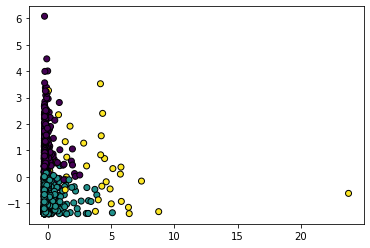

In [12]:
# 시각화는 2차원까지밖에 안된다.
# 시각화를 쓰기 위해선 차원 축소(PCA)를 거쳐야 함
# 차원축소를 해서 2차원 평면에 그릴때, 스캐터플롯 상에서 그리기 어려운게 많은거같음
# 그래서 정환님이 시각화를 하지 말라고 하신 것 같다. 

plt.scatter(data['직장인구'], data['상주인구'], c=cluster, linewidth=1, edgecolor='black')
plt.show()

## 가장 적합한 클러스터 개수 찾기

### 실루엣 점수

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

best_n = 1
best_score = -1

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(data)
    cluster = kmeans.predict(data)
    score = silhouette_score(data, cluster)
    
    print('클러스터의 수 : {}, 실루엣 점수 : {:.2f}'.format(n_cluster, score))
    if score > best_score :
        best_n = n_cluster
        best_score = score
        
print('가장 높은 실루엣 점수를 가진 클러스터 수 : {}, 실루엣 점수 : {:.2f}'.format(best_n, best_score))

클러스터의 수 : 2, 실루엣 점수 : 0.78
클러스터의 수 : 3, 실루엣 점수 : 0.37
클러스터의 수 : 4, 실루엣 점수 : 0.38
클러스터의 수 : 5, 실루엣 점수 : 0.38
클러스터의 수 : 6, 실루엣 점수 : 0.38
클러스터의 수 : 7, 실루엣 점수 : 0.32
클러스터의 수 : 8, 실루엣 점수 : 0.34
클러스터의 수 : 9, 실루엣 점수 : 0.34
클러스터의 수 : 10, 실루엣 점수 : 0.28
가장 높은 실루엣 점수를 가진 클러스터 수 : 2, 실루엣 점수 : 0.78


## 엘보우 포인트

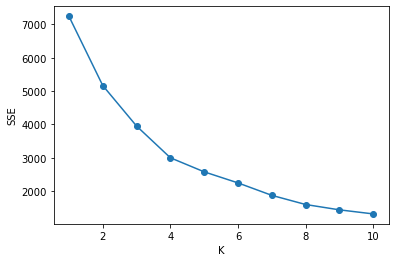

In [14]:
def elbow(X):
    sse = []

    for i in range(1,11):
        km = KMeans(n_clusters=i,algorithm='auto', random_state=42)
        km.fit(X)
        sse.append(km.inertia_)

    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('K')
    plt.ylabel('SSE')
    plt.show()

elbow(data)

## 클러스터화 된 array를 데이터프레임으로 변환

In [15]:
df_cl = pd.DataFrame(cluster,columns=["cluster"])
df_cl

,cluster
0,8
1,1
2,1
3,0
4,8
...,...
1443,8
1444,1
1445,0
1446,8


In [16]:
df_cl.describe()

,cluster
count,1448.000000
mean,3.664365
std,3.471364
min,0.000000
25%,0.000000
50%,1.000000
75%,8.000000
max,9.000000


In [17]:
data

,유동인구,직장인구,집객시설,상주인구,점포수
0,-0.379660,-0.276883,-0.487783,0.230635,-0.393446
1,-0.054264,-0.262136,-0.325934,0.837778,-0.271909
2,-0.155122,-0.236823,-0.487783,0.601048,-0.249854
3,-0.954543,-0.292365,-0.552523,-1.226648,-0.292556
4,0.201444,-0.282122,-0.455413,-0.073633,-0.290210
...,...,...,...,...,...
1443,-0.102489,-0.269003,-0.002235,-0.496962,0.049999
1444,0.191144,-0.266494,-0.099345,0.403309,-0.139579
1445,-0.329975,-0.280581,-0.261194,-0.948838,-0.339012
1446,0.050364,-0.276487,-0.423044,0.008526,-0.215599


In [18]:
final = pd.concat([data, df_cl],axis=1)

In [19]:
need_name = pd.read_excel('norm_data.xlsx')

In [20]:
need_name

,Unnamed: 0,상권코드명,유동인구,직장인구,집객시설,상주인구,점포수
0,0,가로공원로58길,-0.379660,-0.276883,-0.487783,0.230635,-0.393446
1,1,가로공원로76가길,-0.054264,-0.262136,-0.325934,0.837778,-0.271909
2,2,가로공원로80길,-0.155122,-0.236823,-0.487783,0.601048,-0.249854
3,3,가리봉시장,-0.954543,-0.292365,-0.552523,-1.226648,-0.292556
4,4,가마산로61길,0.201444,-0.282122,-0.455413,-0.073633,-0.290210
...,...,...,...,...,...,...,...
1443,1443,휘경로2길,-0.102489,-0.269003,-0.002235,-0.496962,0.049999
1444,1444,휘경로3길,0.191144,-0.266494,-0.099345,0.403309,-0.139579
1445,1445,흑석로13길,-0.329975,-0.280581,-0.261194,-0.948838,-0.339012
1446,1446,흑석로9길,0.050364,-0.276487,-0.423044,0.008526,-0.215599


In [21]:
need_name = need_name[['상권코드명']]

In [22]:
need_name

,상권코드명
0,가로공원로58길
1,가로공원로76가길
2,가로공원로80길
3,가리봉시장
4,가마산로61길
...,...
1443,휘경로2길
1444,휘경로3길
1445,흑석로13길
1446,흑석로9길


In [23]:
final = pd.concat([need_name, final],axis=1)

In [24]:
final.to_excel('final.xlsx')